# Date

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
CSV_FILE_PATH = './landslide_catalog.csv'
df = pd.read_csv(CSV_FILE_PATH)
df.head(5)

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [7]:
df.loc[[1,2,3],'date']

1    3/22/07
2     4/6/07
3    4/14/07
Name: date, dtype: object

In [8]:
df['date_parsed'] = pd.to_datetime(df['date'], infer_datetime_format = True, utc = True)

In [9]:
df.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02 00:00:00+00:00
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22 00:00:00+00:00
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06 00:00:00+00:00
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14 00:00:00+00:00
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15 00:00:00+00:00


In [10]:
day_of_month_df = df['date_parsed'].dt.day

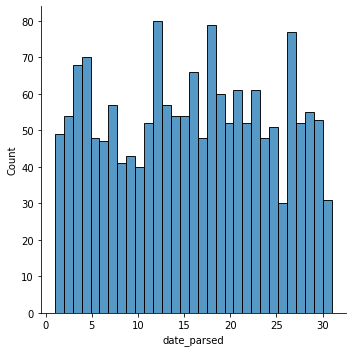

In [14]:
sns.displot(day_of_month_df, kde=False, bins=31)

# Character Encoding

In [20]:
import chardet  
import urllib 

In [18]:
before = "This is the euro symbol: €"
after=before.encode("ascii",errors="replace")
print(after.decode("ascii"))

This is the euro symbol: ?


In [34]:
with open("ks-projects-201612.csv",'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [35]:
kickstarter_2016 = pd.read_csv("ks-projects-201612.csv",encoding='Windows-1252')
kickstarter_2016.head()

C:\Users\albert\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [65]:
kickstarter_2016.iloc[:,[13,14,15,16]].notnull()

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
323745,True,True,True,True
323746,True,True,True,True
323747,True,True,True,True
323748,True,True,True,True


In [68]:
kickstarter_2016[(kickstarter_2016.iloc[:,[13,14,15,16]].notnull().T.any())] #https://www.jb51.net/article/169635.htm

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
1454,1008705746,Zephyra´s new full length,'As The World Collapses',Metal,Music,SEK,2016-02-02 00:56:46,15000,2016-01-03 00:56:46,4262,failed,14,SE,504.94765278,NaN,NaN,NaN
1563,1009317190,French Cuisine,A Traditional Experience,Cookbooks,Food,USD,2014-09-08 00:46:23,13730,2014-08-09 03:16:02,3984,failed,46,US,3984,NaN,NaN,NaN
1794,1010871699,The Beginners Guide to being Unsuicidal,the one act,Theater,Theater,USD,2011-12-31 23:25:46,5000,2011-11-21 23:25:46,525,failed,10,US,525,NaN,NaN,NaN
1931,1011687764,Best OnLine Classifieds,Ever / No More Spam,Web,Technology,USD,2014-09-20 19:56:10,6300,2014-08-21 19:56:10,0,failed,0,US,0,NaN,NaN,NaN
2420,101453314,Social Media Ruined My Life,A Short Film from Adam S Curtis,Shorts,Film & Video,USD,2013-03-14 20:11:57,3000,2013-02-25 21:11:57,3035,successful,42,US,3035,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321945,989007729,THROUGH MY EYES,MY LIFE IN THE MISSISSIPPI DELTA,Narrative Film,Film & Video,USD,2012-04-05 02:34:49,3500,2012-03-06 02:34:49,10,failed,1,US,10,NaN,NaN,NaN
322162,990511774,Daniel Hresko's new CD is (almost) ready,so get on board!,Indie Rock,Music,USD,2011-09-06 05:59:00,400,2011-08-06 15:36:39,61,failed,4,US,61,NaN,NaN,NaN
322204,990746749,Feet on the Ground,Head in the Clouds,Film & Video,Film & Video,USD,2013-04-17 16:00:31,35000,2013-03-18 15:00:31,179,failed,10,US,179,NaN,NaN,NaN
323138,996542939,'WANDER' - Apocalyptic Short Film,Post Production,Shorts,Film & Video,GBP,2015-04-26 17:12:59,1500,2015-02-25 17:12:59,2501,successful,50,GB,3861.84447014,NaN,NaN,NaN


# Duplication

In [23]:
df_with_dups = pd.read_csv("Reviews.csv")

In [24]:
df_sorted = df_with_dups.sort_values(by='ProductId',ascending=True)

In [28]:
subset=["ProductId", "UserId", "ProfileName", "Time"]

In [29]:
df_sorted.drop_duplicates(subset=subset, keep='first', inplace=True)

In [30]:
print("Data retained after deduplication:", len(df_sorted)/len(df_with_dups))

Data retained after deduplication: 0.9926326492557005
